In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
# Reading in the dataset
df = pd.read_csv('bodyfat.csv')

## Dataset Introduction
Data from 252 men was collected, and a total of 15 different variables were recorded. From http://lib.stat.cmu.edu/datasets/bodyfat, the descriptions of each variable is listed down below:

- Density: Body Density in g/cm3
- Body Fat Percent: % of the body that consists of fat tissue 
- Age: Age of the subject in years
- Weight: Weight of the subject in lbs
- Height: Height of the subject in inches
- Neck: Neck circumference (cm)
- Chest: Chest circumference (cm)
- Abdomen: Abdomen circumference (cm)
- Hip: Hip circumference (cm)
- Thigh: Thigh circumference (cm)
- Knee: Knee circumference (cm)
- Ankle: Ankle circumference (cm)
- Biceps: Biceps (extended) circumference (cm)
- Forearm: Forearm circumference (cm)
- Wrist: Wrist circumference (cm)

In [7]:
df.head()

,Body Density,Body Fat Percent,Age,Weight,Height,Neck (cm),Chest (cm),Abdomen (cm),Hip (cm),Thigh (cm),Knee (cm),Ankle (cm),Biceps (cm),Forearm (cm),Wrist (cm)
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Body Density      252 non-null    float64
 1   Body Fat Percent  252 non-null    float64
 2   Age               252 non-null    int64  
 3   Weight            252 non-null    float64
 4   Height            252 non-null    float64
 5   Neck (cm)         252 non-null    float64
 6   Chest (cm)        252 non-null    float64
 7   Abdomen (cm)      252 non-null    float64
 8   Hip (cm)          252 non-null    float64
 9   Thigh (cm)        252 non-null    float64
 10  Knee (cm)         252 non-null    float64
 11  Ankle (cm)        252 non-null    float64
 12  Biceps (cm)       252 non-null    float64
 13  Forearm (cm)      252 non-null    float64
 14  Wrist (cm)        252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


# Data Cleaning
- The Weight and Height column have units of lbs and inches respectively. Lets change them to kg and cm, which are more familiar to a Singaporean context.

In [45]:
df['Weight'] = round(df['Weight']/2.205,1)
df['Height'] = round(df['Height']*2.54,1)

df = df.rename(columns = {'Weight': 'Weight (kg)', 'Height': 'Height (cm)'})

# Exploratory Data Analysis

In [42]:
len(df.columns)

15

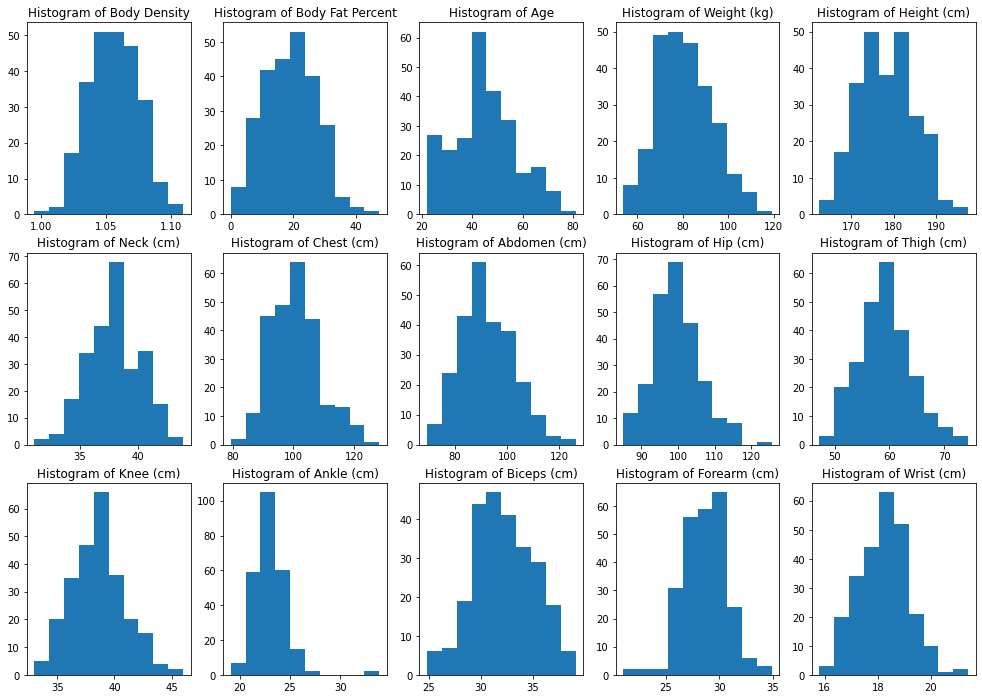

In [60]:
fig, axs = plt.subplots(3,5)
num = 1
row = 0
for feature in df.columns:
    if (num >5  and num <=10):
        row = 1
    elif num > 10:
        row = 2
    else:
        row = 0
    col = num % 5 -1
    axs[row,col].hist(df[feature])
    axs[row,col].set_title('Histogram of ' + feature)
    num += 1 
fig.set_size_inches(17,12)

In [47]:
df.describe()

,Body Density,Body Fat Percent,Age,Weight (kg),Height (cm),Neck (cm),Chest (cm),Abdomen (cm),Hip (cm),Thigh (cm),Knee (cm),Ankle (cm),Biceps (cm),Forearm (cm),Wrist (cm)
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,81.143254,178.176587,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,13.329454,9.305915,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,53.700000,74.900000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,72.100000,173.400000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,80.050000,177.800000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,89.300000,183.500000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,164.700000,197.500000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [53]:
df[df['Weight (kg)']>150]['Weight (kg)'].value_counts()

164.7    1
Name: Weight (kg), dtype: int64

In [54]:
df[df['Height (cm)']<100]['Height (cm)'].value_counts()

74.9    1
Name: Height (cm), dtype: int64

In [59]:
# Removing Height and Weight Outliers
df = df[(df['Height (cm)'] >= 100) & (df['Weight (kg)'] <= 150)]

In [ ]:
def corr(x, y, **kwargs):
    
    # Calculate the value of correlation
    coef = np.corrcoef(x, y)[0][1]
    
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

In [68]:
import numpy as np

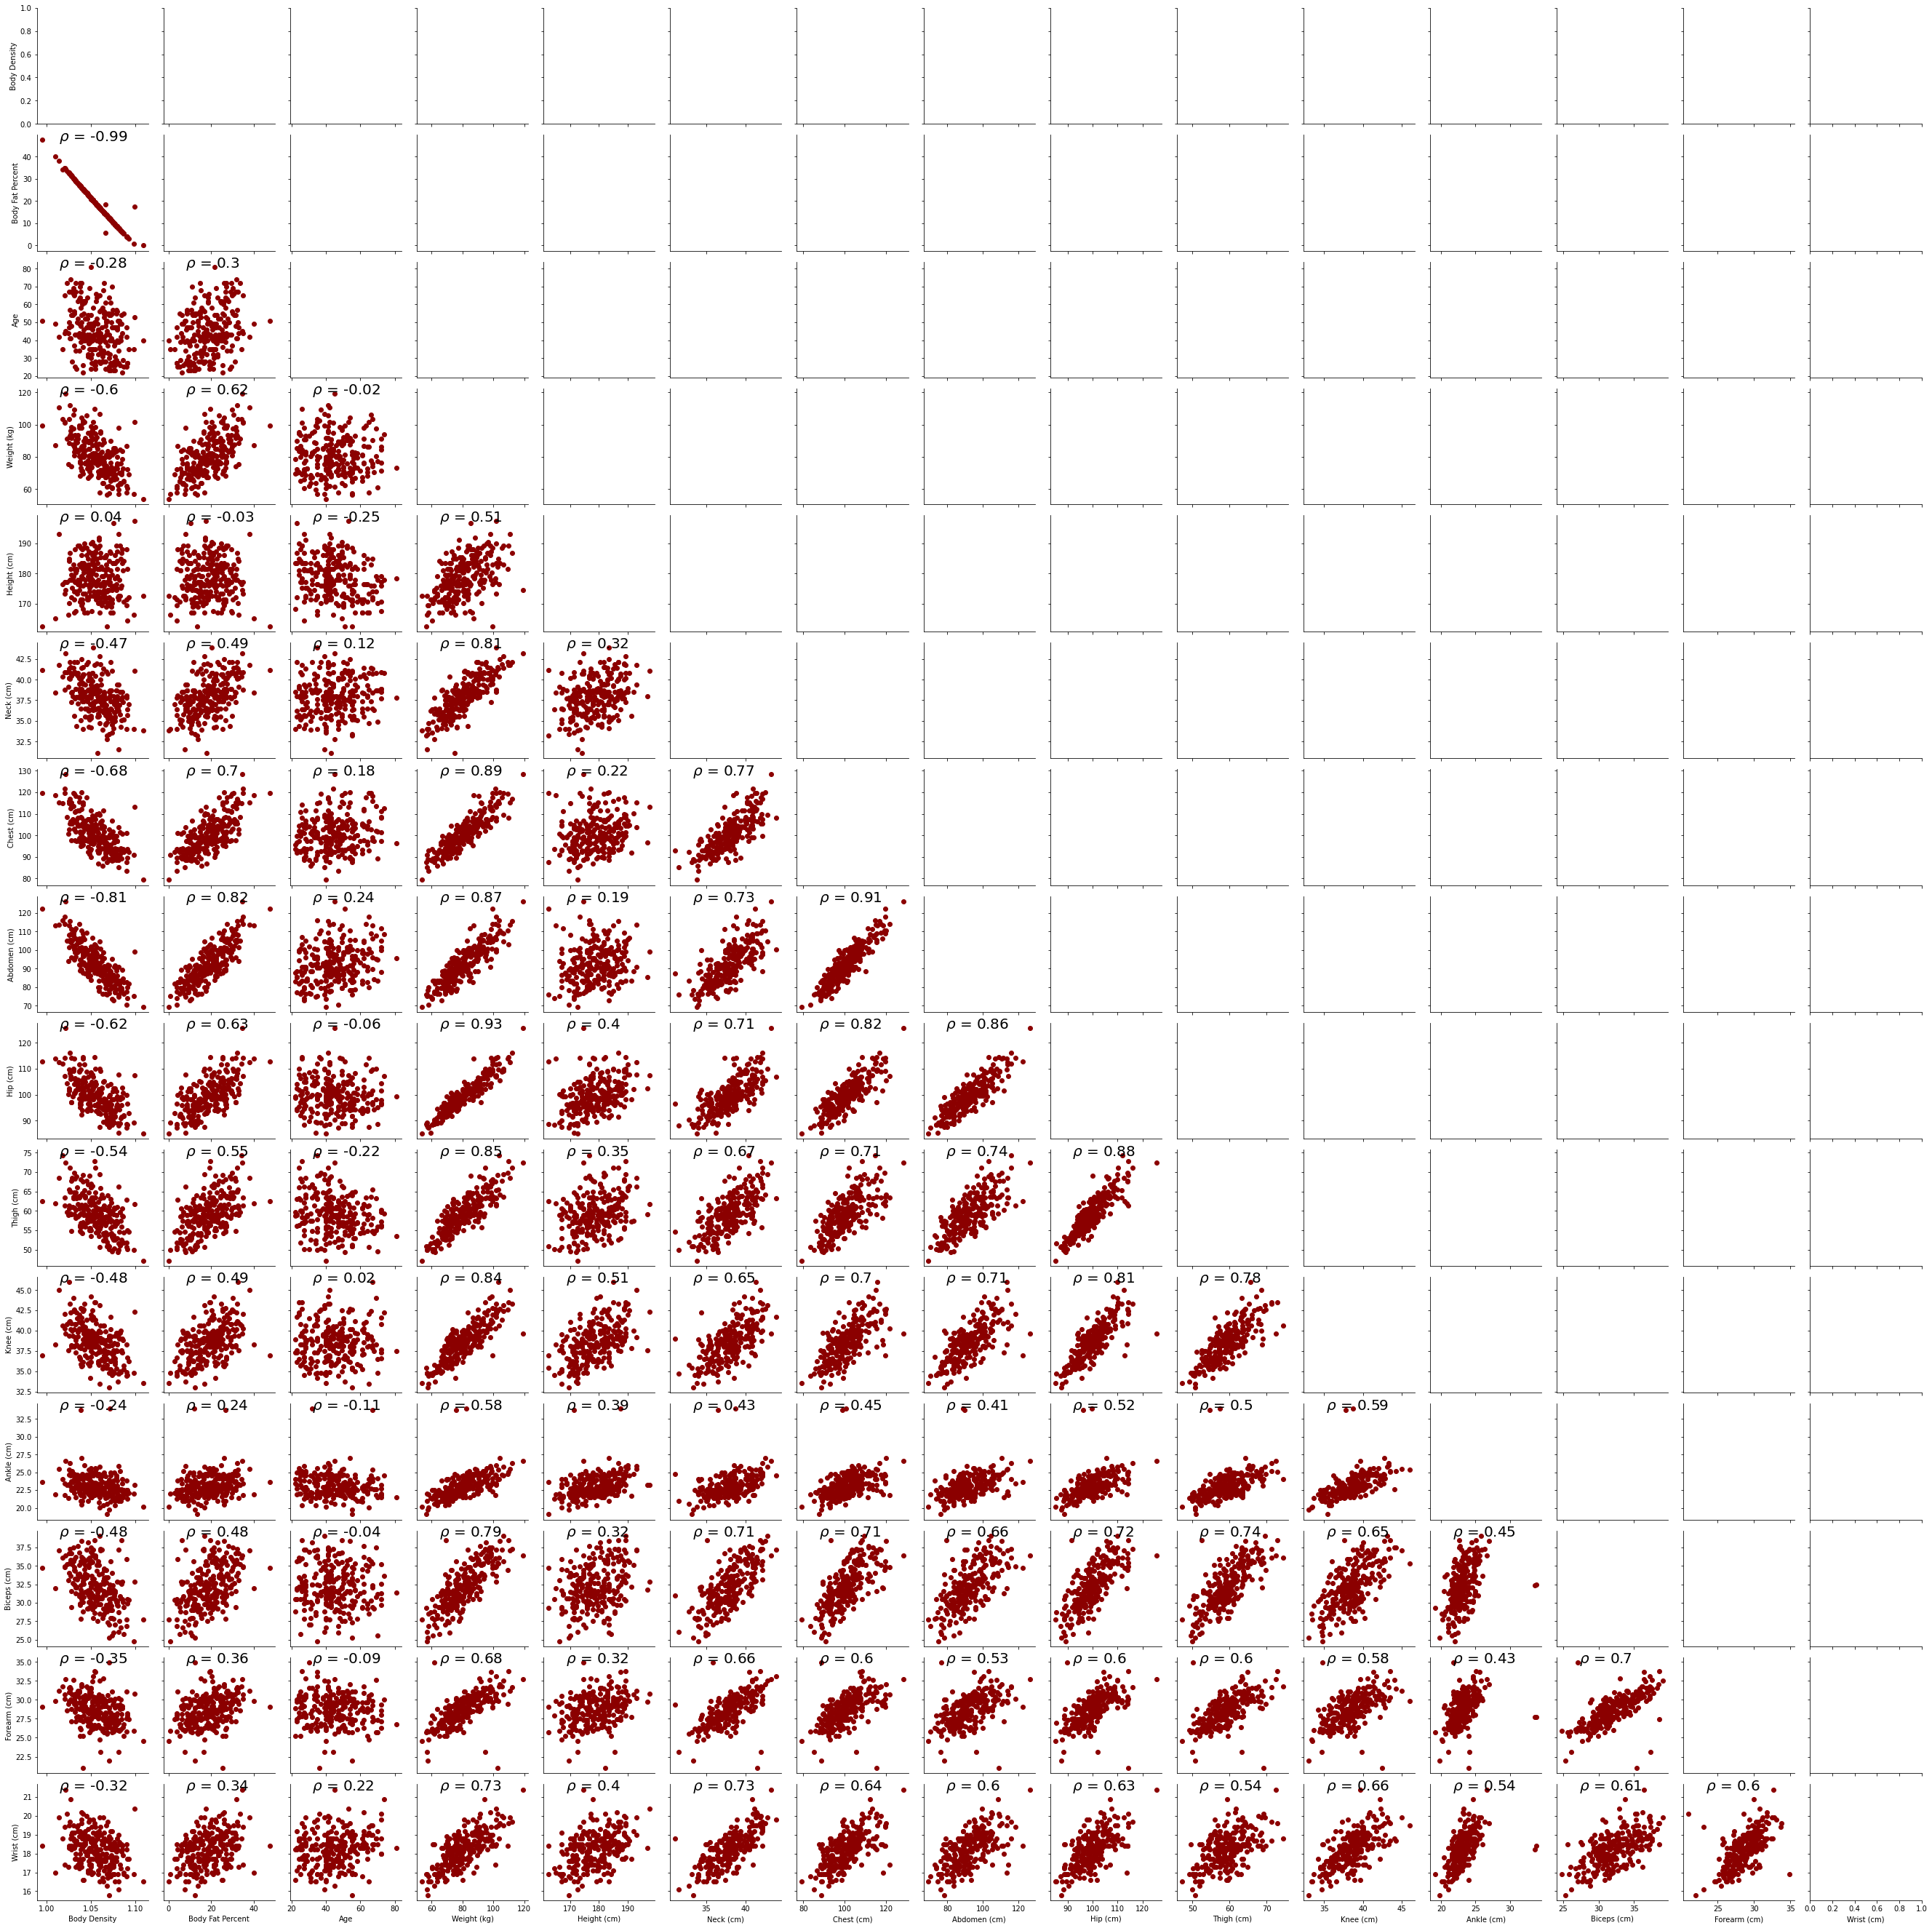

In [69]:
# Pair Grid to show the correlation of each feature. Note that body density and body fat has a correlation of 1.
# Body density was used in an analytical equation to calculate bodyfat, which explains the correlation. 
# It will be dropped.

grid = sns.PairGrid(data = df)
grid.map_lower(plt.scatter, color = 'darkred')
grid.map_lower(corr)
plt.show()

# Model Building

In [233]:
# Importing Libraries for Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import SGDRegressor

import math

In [74]:
X = df.drop(['Body Density','Body Fat Percent'], axis =1)
y = df['Body Fat Percent']

# Quite a small dataset, thus traditional ML models will be used.

(250, 13)

In [193]:
# Splitting to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [198]:
X_train.shape

(200, 13)

In [194]:
# Performing scaling for the features, for easier training of models

scaler = StandardScaler()

X_trainscaled = X_train.copy()
X_testscaled = X_test.copy()
y_trainscaled = y_train.copy()
y_testscaled = y_test.copy()

cols_to_scale = X.columns
X_trainscaled[cols_to_scale]=scaler.fit_transform(X_trainscaled[cols_to_scale])
X_testscaled[cols_to_scale]=scaler.fit_transform(X_testscaled[cols_to_scale])

y_trainscaled = scaler.fit_transform(y_train.values.reshape(-1,1))
y_testscaled = scaler.fit_transform(y_test.values.reshape(-1,1))

0.3944462287774567


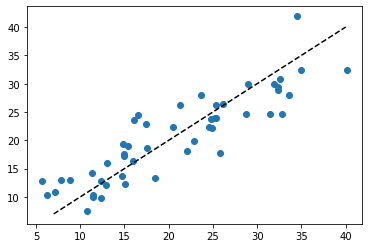

In [195]:
# Random Forest
RFF = RandomForestRegressor(random_state = 1)
RFF.fit(X_trainscaled,y_trainscaled.ravel())
predictions = RFF.predict(X_testscaled)
print(mean_absolute_error(y_testscaled,predictions))

unscaled_predictions = scaler.inverse_transform(predictions)
unscaled_ytest = scaler.inverse_transform(y_testscaled)

plt.scatter(unscaled_ytest,unscaled_predictions)
plt.plot([7,40],[7,40],'k--')
plt.show()

0.5106000197208025


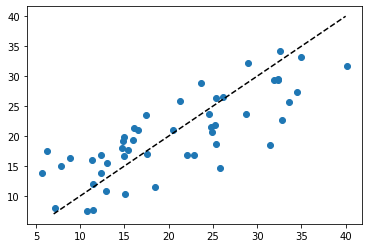

In [196]:
# Support Vector Machine
SVMreg = svm.SVR()
SVMreg.fit(X_trainscaled,y_trainscaled.ravel())
predictions =SVMreg.predict(X_testscaled)
print(mean_absolute_error(y_testscaled,predictions))

unscaled_predictions = scaler.inverse_transform(predictions)
unscaled_ytest = scaler.inverse_transform(y_testscaled)

plt.scatter(unscaled_ytest,unscaled_predictions)
plt.plot([7,40],[7,40],'k--')
plt.show()

In [197]:
# Decision Tree
DTR = tree.DecisionTreeRegressor(criterion='mae',random_state =1)
DTR.fit(X_trainscaled,y_trainscaled.ravel())
predictions =DTR.predict(X_testscaled)
print(mean_absolute_error(y_testscaled,predictions))

0.678393081952789


0.4628001396136653


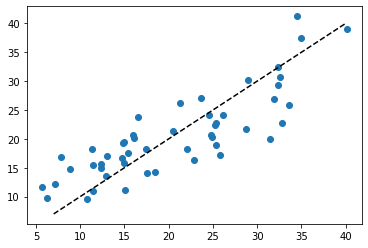

In [199]:
# Stochastic Gradient Descent
SGD = SGDRegressor(random_state=1)
SGD.fit(X_trainscaled,y_trainscaled.ravel())
predictions = SGD.predict(X_testscaled)
print(mean_absolute_error(y_testscaled,predictions))

unscaled_predictions = scaler.inverse_transform(predictions)
unscaled_ytest = scaler.inverse_transform(y_testscaled)

plt.scatter(unscaled_ytest,unscaled_predictions)
plt.plot([7,40],[7,40],'k--')
plt.show()

## Model Tuning
- Now that we have seen the performance of some models, lets tune the best performing model, the random forest regressor to see the accuracy scores that are achievable

In [200]:
# Base parameters for the RFF
RFF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [201]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [202]:
# Use the random grid to search for best hyperparameters

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)

rf_random.fit(X_trainscaled,y_trainscaled.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, verbose=2)

In [203]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [235]:
# Define evaluation function for models

def evaluate(model, test_features, test_labels):
    predictions = scaler.inverse_transform(model.predict(test_features))
    errors = abs(predictions - scaler.inverse_transform(test_labels))
    mape = 100 * np.mean(abs(errors / scaler.inverse_transform(test_labels)))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Root Mean Squared Error = {:0.2f}'.format(math.sqrt(mean_squared_error(scaler.inverse_transform(test_labels), predictions))))
    
    return accuracy

In [236]:
# Default RFF model performance
base_accuracy = evaluate(RFF, X_testscaled,y_testscaled.ravel())
base_accuracy

Model Performance
Average Error: 3.4734 degrees.
Accuracy = 78.45%.
Root Mean Squared Error = 4.15


78.44645285364633

In [237]:
# Best random search performance
best_random = rf_random.best_estimator_
best_random_acc = evaluate(best_random,X_testscaled,y_testscaled.ravel())
best_random_acc 

Model Performance
Average Error: 3.4166 degrees.
Accuracy = 78.45%.
Root Mean Squared Error = 4.07


78.45013689857097

In [242]:
from sklearn.model_selection import GridSearchCV
# Parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto'],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [3, 4, 5, 6],
    'n_estimators': [200, 300, 400, 500]
}

rf = RandomForestRegressor()
# Grid Search to cover all possibilities
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_trainscaled,y_trainscaled.ravel())

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [200, 300, 400, 500]},
             verbose=2)

In [243]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 200}

In [244]:
# Best Grid search performance
best_search = grid_search.best_estimator_
best_search_acc = evaluate(best_search,X_testscaled,y_testscaled.ravel())
best_search_acc 

Model Performance
Average Error: 3.3429 degrees.
Accuracy = 79.09%.
Root Mean Squared Error = 4.03


79.08955953113215

As we can see, the grid search provided the highest accuracy, and the lowest root mean squared error. The increase from the random search was not very high, thus, given this small dataset, it is taken as the final model.

Following are plots of the actual and predicted body fat percentage values from the test dataset.

0.3779104071235583


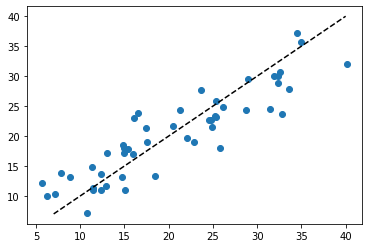

In [245]:
best_search.fit(X_trainscaled,y_trainscaled.ravel())
predictions = best_search.predict(X_testscaled)
print(mean_absolute_error(y_testscaled,predictions))

unscaled_predictions = scaler.inverse_transform(predictions)
unscaled_ytest = scaler.inverse_transform(y_testscaled)

plt.scatter(unscaled_ytest,unscaled_predictions)
plt.plot([7,40],[7,40],'k--')
plt.show()

0.38258708921641577


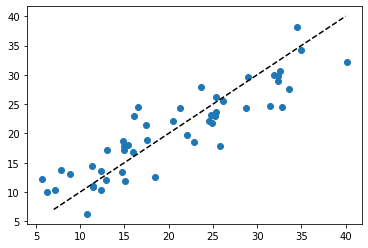

In [246]:
best_random.fit(X_trainscaled,y_trainscaled.ravel())
predictions = best_random.predict(X_testscaled)
print(mean_absolute_error(y_testscaled,predictions))

unscaled_predictions = scaler.inverse_transform(predictions)
unscaled_ytest = scaler.inverse_transform(y_testscaled)

plt.scatter(unscaled_ytest,unscaled_predictions)
plt.plot([7,40],[7,40],'k--')
plt.show()

# Conclusion

- Body fat percentage is a very inconvenvient metric to measure for the average person, yet it is a very crucial piece of information that can reveal an individual's health.
- With more data points, a model can be trained to give better predictions of one's body fat percentage based on simple body measurements. 